Этот набор данных содержит информацию о бронировании для городского и курортного отеля, а также включает такие данные, как время бронирования, продолжительность пребывания, количество взрослых, детей и/или младенцев, а также количество доступных парковочных мест, среди прочего.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [1]:
#Загрузка необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
#Загружаем данные
df = pd.read_csv('D:/RStudio/ML/hotel_bookings.csv')
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
#Подронбная информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Вычисление основных характеристик
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#Корреляционная матрица
corrMatrix = df.select_dtypes(include=['int64','float64']).corr()
corrMatrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [ ]:
#ПРопущенные значения
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [5]:
#Удаление столбца, т.к. пропущено ~95% значений
df = df.drop(columns=['company'])

In [6]:
#Заполняем пропущенные значения
df["agent"] = df["agent"].fillna("no_agent").astype(str)
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')

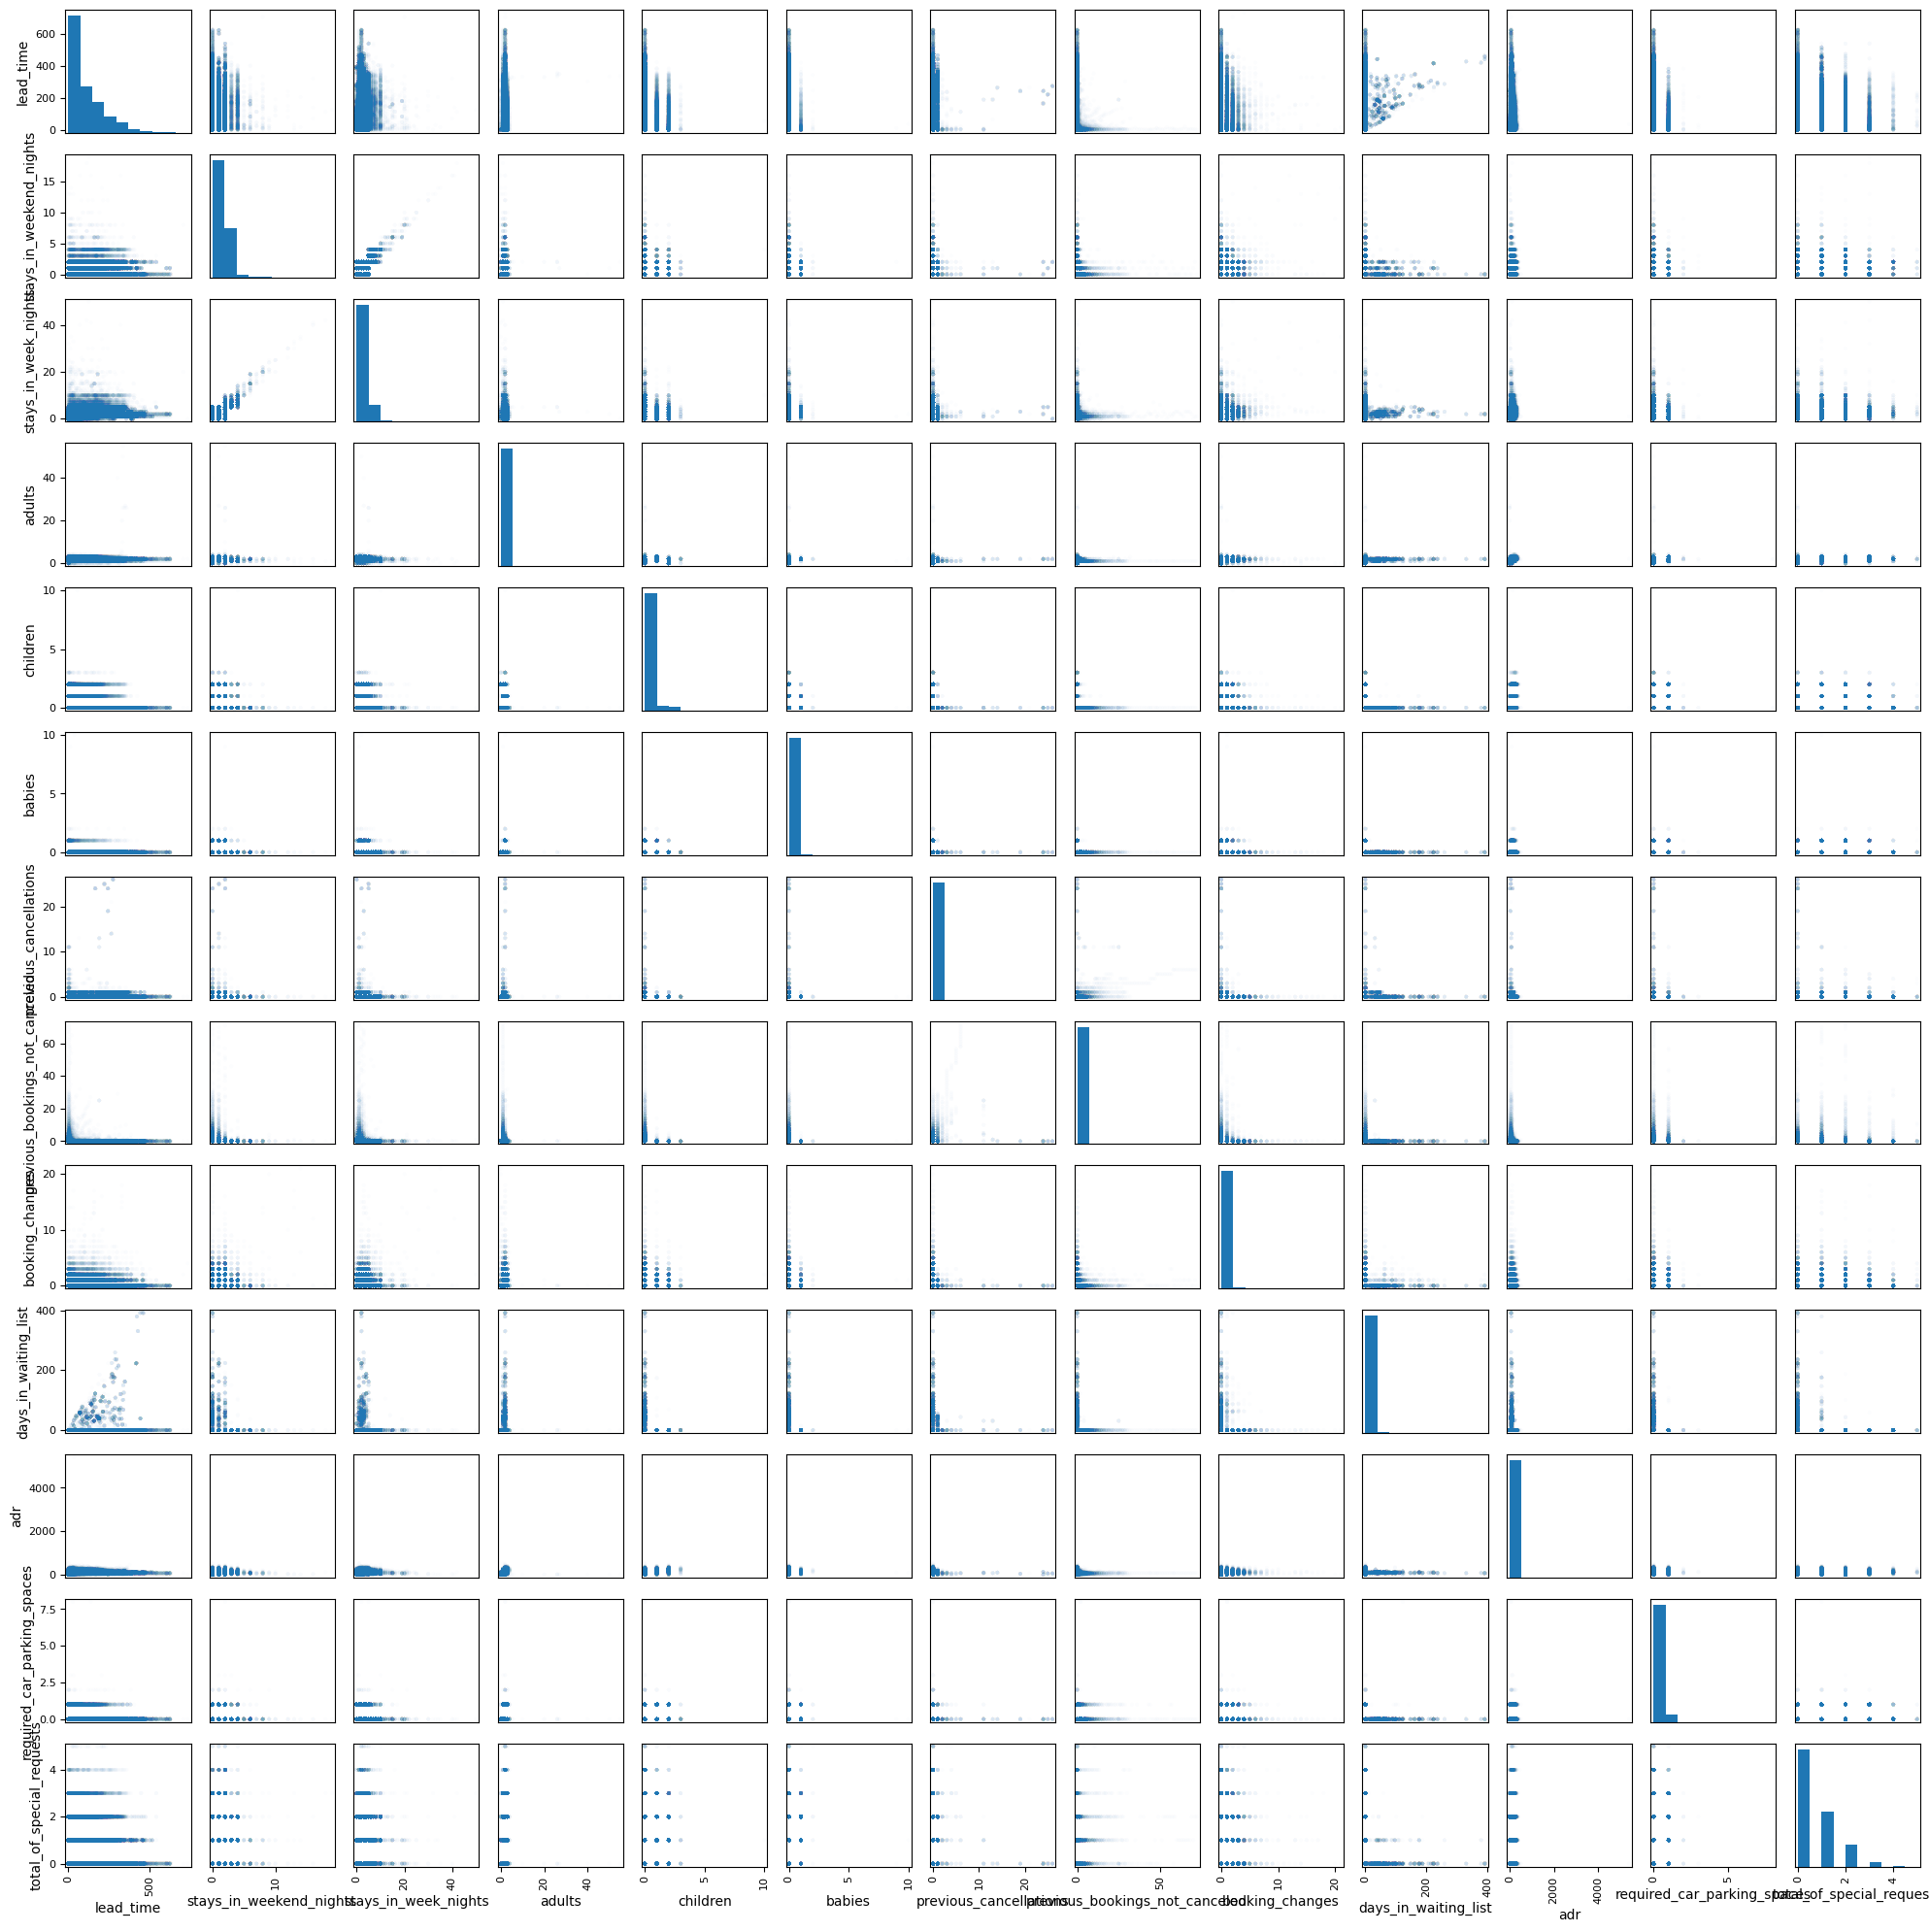

In [7]:
#Удаляем признаки с утечкой
df = df.drop(columns=['reservation_status', 'reservation_status_date'], errors='ignore')

#Целевая переменная
y = df['is_canceled']

#Явно задаём нужные признаки
num_features = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies',
    'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'days_in_waiting_list',
    'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]

cat_features = [
    'hotel', 'meal', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'deposit_type', 'customer_type',
    'is_repeated_guest', 'arrival_date_month', 'country'
]

#Визуализируем данные
scatter_matrix(df[num_features], alpha=0.01, figsize=(20, 20))
plt.tight_layout()
plt.show()

In [8]:
#Оставляем только выбранные столбцы + целевая переменная
df_model = df[num_features + cat_features + ['is_canceled']].copy()

#One-hot кодирование
df_model = pd.get_dummies(df_model, columns=cat_features, drop_first=True)

X = df_model.drop(columns=['is_canceled'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Масштабируем числовые признаки
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

model = LogisticRegression(max_iter=1000, n_jobs=-1)
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print("Train acc:", accuracy_score(y_train, pred_train))
print("Test acc:", accuracy_score(y_test, pred_test))

Train acc: 0.8137092721333445
Test acc: 0.8126308736075049


In [ ]:
#Подбор наилучших параметро для ЛР
from sklearn.model_selection import GridSearchCV

param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': [None, 'balanced']
}

log_clf = LogisticRegression(max_iter=1000, n_jobs=-1)

grid_log = GridSearchCV(
    estimator=log_clf,
    param_grid=param_grid_log,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_log.fit(X_train, y_train)

best_log = grid_log.best_estimator_
pred_train_best = best_log.predict(X_train)
pred_test_best = best_log.predict(X_test)

print("Best params (LogReg):", grid_log.best_params_)
print("Best LogReg Train acc:", accuracy_score(y_train, pred_train_best))
print("Best LogReg Test acc:", accuracy_score(y_test, pred_test_best))

Best params (LogReg): {'C': 10, 'class_weight': None, 'solver': 'lbfgs'}
Best LogReg Train acc: 0.813615043135941
Best LogReg Test acc: 0.8127983918251109


/tmp/ipython-input-2358037877.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


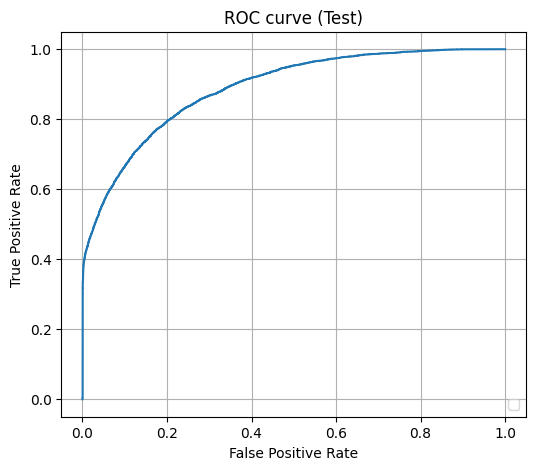

<Figure size 500x500 with 0 Axes>

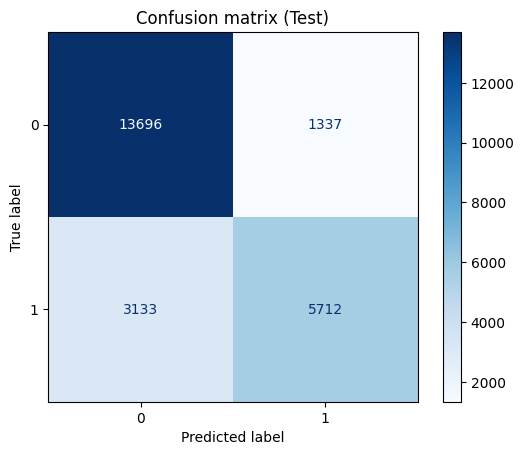

In [ ]:
from sklearn.metrics import (
    accuracy_score, roc_curve, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
y_proba_test = best_log.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = roc_auc_score(y_test, y_proba_test)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve (Test)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

cm = confusion_matrix(y_test, pred_test_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(5, 5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion matrix (Test)")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, pred_test_best)
prec = precision_score(y_test, pred_test_best)
rec = recall_score(y_test, pred_test_best)
f1 = f1_score(y_test, pred_test_best)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1:", f1)

Accuracy: 0.8127983918251109
Precision: 0.8103277060575969
Recall: 0.6457885811192764
F1: 0.7187617969044923


In [ ]:
#Подбор наилучших параметро для RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100],
    'max_depth': [1, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
pred_train_rf = best_rf.predict(X_train)
pred_test_rf = best_rf.predict(X_test)

print("RF best params:", grid_rf.best_params_)
print("RF Train acc:", accuracy_score(y_train, pred_train_rf))
print("RF Test acc:", accuracy_score(y_test, pred_test_rf))

RF best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
RF Train acc: 0.7647625429265432
RF Test acc: 0.7641343496105202


/tmp/ipython-input-343218053.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


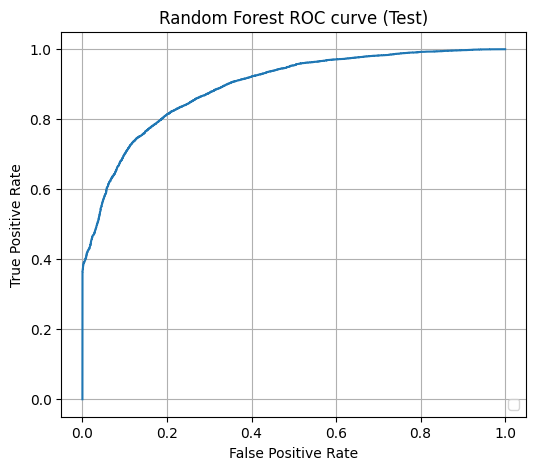

<Figure size 500x500 with 0 Axes>

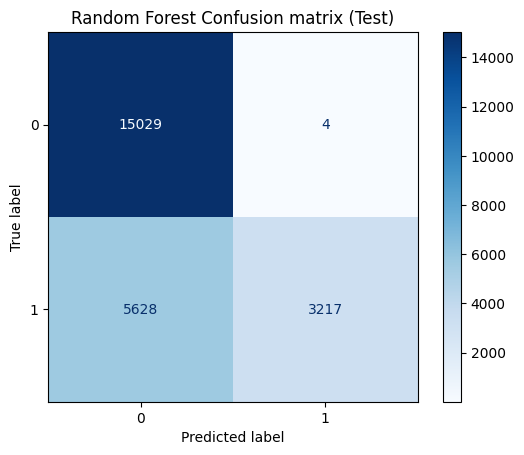

In [ ]:
y_proba_test_rf = best_rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_test_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_test_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC curve (Test)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

cm_rf = confusion_matrix(y_test, pred_test_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
plt.figure(figsize=(5, 5))
disp_rf.plot(cmap="Blues", values_format="d")
plt.title("Random Forest Confusion matrix (Test)")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Метрики на тестовой выборке
acc_rf = accuracy_score(y_test, pred_test_rf)
prec_rf = precision_score(y_test, pred_test_rf)
rec_rf = recall_score(y_test, pred_test_rf)
f1_rf = f1_score(y_test, pred_test_rf)

print("RF Accuracy:", acc_rf)
print("RF Precision:", prec_rf)
print("RF Recall:", rec_rf)
print("RF F1:", f1_rf)

RF Accuracy: 0.7641343496105202
RF Precision: 0.998758149642968
RF Recall: 0.36370830977953644
RF F1: 0.5332338803248798


In [ ]:
#Подбор наилучших параметро для KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [1, 3, 5],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
pred_train_knn = best_knn.predict(X_train)
pred_test_knn = best_knn.predict(X_test)

print("KNN best params:", grid_knn.best_params_)
print("KNN Train acc:", accuracy_score(y_train, pred_train_knn))
print("KNN Test acc:", accuracy_score(y_test, pred_test_knn))

KNN best params: {'n_neighbors': 5, 'weights': 'distance'}
KNN Train acc: 0.9953723092386297
KNN Test acc: 0.8516207387553396


/tmp/ipython-input-1085094554.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


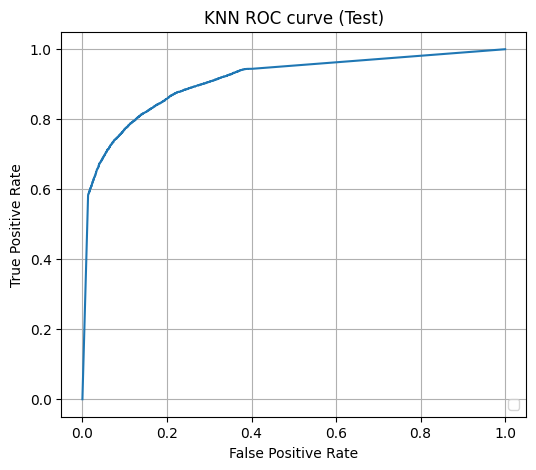

<Figure size 500x500 with 0 Axes>

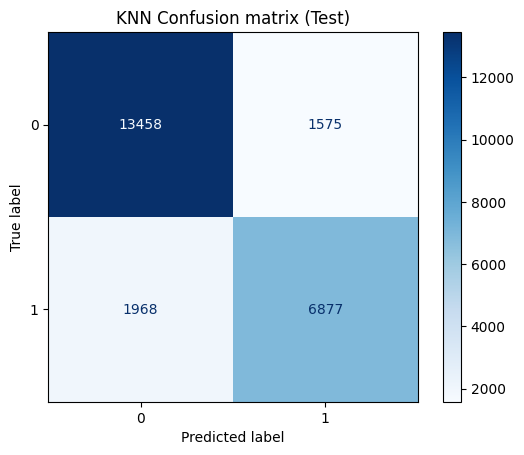

In [ ]:
y_proba_test_knn = best_knn.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_test_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_test_knn)

plt.figure(figsize=(6, 5))
plt.plot(fpr_knn, tpr_knn)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC curve (Test)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

cm_knn = confusion_matrix(y_test, pred_test_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
plt.figure(figsize=(5, 5))
disp_knn.plot(cmap="Blues", values_format="d")
plt.title("KNN Confusion matrix (Test)")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Метрики на тестовой выборке для KNN
acc_knn = accuracy_score(y_test, pred_test_knn)
prec_knn = precision_score(y_test, pred_test_knn)
rec_knn = recall_score(y_test, pred_test_knn)
f1_knn = f1_score(y_test, pred_test_knn)

print("KNN Accuracy:", acc_knn)
print("KNN Precision:", prec_knn)
print("KNN Recall:", rec_knn)
print("KNN F1:", f1_knn)

KNN Accuracy: 0.8516207387553396
KNN Precision: 0.8136535731187885
KNN Recall: 0.7775014132278123
KNN F1: 0.7951667919292363


# Вывод:
KNN показывает наивысшую точность на тесте (≈0.852), что делает его лидером по метрике accuracy. Однако на обучающей выборке точность почти идеальна (≈0.995), а на тестовой ощутимо ниже. Такой большой разрыв между train и test говорит, что модель слишком сильно подстраивается под обучающие данные и плохо обобщает новые примеры, я склонен полагать это признак переобучения.
Логистическая регрессия даёт немного меньшую test accuracy (≈0.813), но при этом значения на обучении и тесте практически совпадают. Это означает, что модель обобщает устойчиво, не переобучается.
Случайный лес с подобранными параметрами демонстрирует самое низкое качество (≈0.764) и выглядит скорее недообученным, чем переобученным — деревья слишком ограничены по глубине и структуре. Наилучшей моделью считаю модель логистической регрессии, а не KNN, так как при обучении модель KNN обучается в несколько раз дольше, что в реальных ситуациях может быть критичным, при этом точность не является значительно разной.

n_clusters: 2 | y unique: [0 1]
Numeric cols: 18 | Categorical cols: 10
X_sparse: (119390, 247)

Сравнение кластеров с истинными метками:
         KMeans (full) | ARI = 0.0560 | NMI = 0.0272
Agglomerative (sample) | ARI = -0.0002 | NMI = 0.0003
       DBSCAN (sample) | ARI = 0.1185 | NMI = 0.1395

Примечание: Agglomerative/DBSCAN считались на подвыборке 5000 из 119390 из-за O(n^2) сложности.


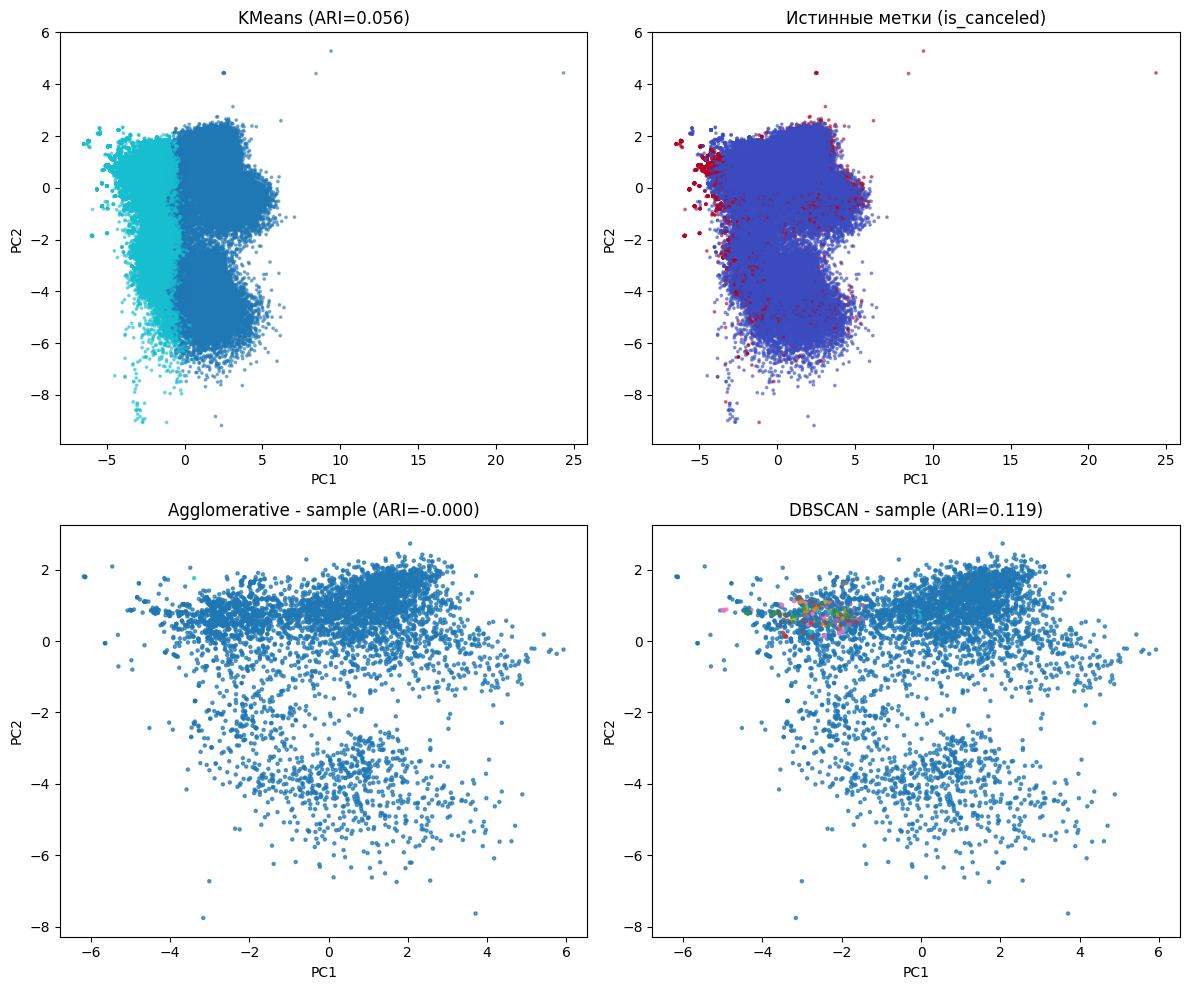

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Заново загрузим данные
df = pd.read_csv('D:/RStudio/ML/hotel_bookings.csv')

# Целевая переменная
y = df['is_canceled'].values
n_clusters = 2
print(f'n_clusters: {n_clusters} | y unique: {np.unique(y)}')

# Удаляем столбцы с утечкой, company и целевую переменную
drop_cols = ['is_canceled', 'reservation_status', 'reservation_status_date', 'company']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# Заполняем пропуски
df['agent'] = df['agent'].fillna(-1)
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')

# Разделение на числовые и категориальные
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'Numeric cols: {len(num_cols)} | Categorical cols: {len(cat_cols)}')

# One-hot кодирование категорий
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
X = df_encoded.values.astype(float)
print(f'X_sparse: {X.shape}')

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA для визуализации
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Подвыборка для O(n^2) алгоритмов
np.random.seed(42)
sample_size = 5000
idx_sample = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[idx_sample]
X_pca_sample = X_pca[idx_sample]
y_sample = y[idx_sample]

#KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)
ari_km = adjusted_rand_score(y, labels_kmeans)
nmi_km = normalized_mutual_info_score(y, labels_kmeans)

#Agglomerative
agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_agg = agg.fit_predict(X_sample)
ari_agg = adjusted_rand_score(y_sample, labels_agg)
nmi_agg = normalized_mutual_info_score(y_sample, labels_agg)

#DBSCAN
dbscan = DBSCAN(eps=3.0, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_sample)
ari_db = adjusted_rand_score(y_sample, labels_dbscan)
nmi_db = normalized_mutual_info_score(y_sample, labels_dbscan)

print('\nСравнение кластеров с истинными метками:')
print(f'{"KMeans":>22} | ARI = {ari_km:.4f} | NMI = {nmi_km:.4f}')
print(f'{"Agglomerative":>22} | ARI = {ari_agg:.4f} | NMI = {nmi_agg:.4f}')
print(f'{"DBSCAN":>22} | ARI = {ari_db:.4f} | NMI = {nmi_db:.4f}')
print(f'\nПримечание: Agglomerative/DBSCAN считались на подвыборке {sample_size} из {len(X)} из-за O(n^2) сложности.')

# Визуализация кластеров в PCA-пространстве
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# KMeans
ax = axes[0, 0]
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='tab10', s=3, alpha=0.5)
ax.set_title(f'KMeans (ARI={ari_km:.3f})')
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')

# Истинные метки
ax = axes[0, 1]
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=3, alpha=0.5)
ax.set_title('Истинные метки (is_canceled)')
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')

# Agglomerative
ax = axes[1, 0]
ax.scatter(X_pca_sample[:, 0], X_pca_sample[:, 1], c=labels_agg, cmap='tab10', s=5, alpha=0.7)
ax.set_title(f'Agglomerative - sample (ARI={ari_agg:.3f})')
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')

# DBSCAN
ax = axes[1, 1]
ax.scatter(X_pca_sample[:, 0], X_pca_sample[:, 1], c=labels_dbscan, cmap='tab10', s=5, alpha=0.7)
ax.set_title(f'DBSCAN - sample (ARI={ari_db:.3f})')
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')

plt.tight_layout()
plt.show()